In [2]:
import pandas as pd
import numpy as np
from IPython.display import display_html
from IPython.display import display, HTML
from itertools import chain,cycle
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon
import cmath
import math


def display_side_by_side(*args,titles=cycle([''])):
    html_str=''
    for df,title in zip(args, chain(titles,cycle(['</br>'])) ):
        html_str+='<th style="text-align:center"><td style="vertical-align:top">'
        html_str+=f'<h2 style="text-align: center;">{title}</h2>'
        html_str+=df.to_html().replace('table','table style="display:inline"')
        html_str+='</td></th>'
    display_html(html_str,raw=True)


# EX1


def tip_calc(bill, party=4):
    if party > 11:
        tip = bill * 0.25
    elif party <= 11 and party > 8:
        tip = bill * 0.20
    elif party <= 8 and party > 6:
        tip = bill * 0.18
    elif party <= 6:
        tip = bill * 0.15
    else:
        tip = bill * 0.15
    return tip



pd.set_option('display.colheader_justify', 'center')
per = 109.29/3
tips_1 = tip_calc(109.29, 3)
tips_2 = tip_calc((per*7), 7)
tips_3 = tip_calc(per*9/1.1, 9)
tips_4 = tip_calc(per*12/1.2, 12)
df_tips = pd.DataFrame({'Numbers in Party': [3, 7, 9, 12],
                        'Tips': [tips_1, tips_2, tips_3, tips_4]})\
                        .set_index('Numbers in Party')
print("All four cases where the number of people in the dinner party"
      " changed from 3, 7, 9, 12 and the bill was $109.29")
print("The tip amounts varied based on number of people in the party from 25%,"
      " 20%, 18%, and 15%. ")
print(df_tips)

display(df_tips.style.set_properties(**{'text-align': 'center'}))

All four cases where the number of people in the dinner party changed from 3, 7, 9, 12 and the bill was $109.29
The tip amounts varied based on number of people in the party from 25%, 20%, 18%, and 15%. 
                    Tips   
Numbers in Party           
3                 16.393500
7                 45.901800
9                 59.612727
12                91.075000


,Tips
Numbers in Party,
3,16.393500
7,45.901800
9,59.612727
12,91.075000


In [3]:
# EX2


def my_mult_operration(a, b, operations=str(r'')):
       
    if operations == 'plus':
        return np.add(a, b)
    if operations == 'minus':
        return np.subtract(a, b)
    if operations == 'mult':
        return np.multiply(a, b)
    if operations == 'div':
        return np.divide(a, b)
    if operations == 'pow':
        return np.power(a, b)
    else:
        print("The choices are 'plus' to add, 'minus' to subtract, 'mult' to multiply, 'div' to divide, 'pow' for a^b.")
        print("For the function my_mult_operration(a = <array>, b = <array>, operations = <'str'>.")
        print('The operation was not one of the choices listed. Please enter one of the choices listed.')


In [4]:
x = np.array([1, 2, 3, 4])
y = np.array([2, 3, 4, 5])
df_input = pd.DataFrame({'Array_a': [x], 'Array_b': [y]}, index=['Input Arrays'])
df_input = df_input.T
case1 = my_mult_operration(x, y, 'plus')
case2 = my_mult_operration(x, y, 'minus')
case3 = my_mult_operration(x, y, 'mult')
case4 = np.around(my_mult_operration(x, y, 'div'), 3)
case5 = my_mult_operration(x, y, 'pow')
df_operations = pd.DataFrame({'Add_a+b': case1, 'Subtract_a-b': case2, 'Multiply_a*b': case3,
                        'Divide_a/b': case4, 'Exponential_a^b': case5})

print(df_input)
print(df_operations.to_string(index=False))

display_side_by_side(df_input.style.set_properties(**{'text-align': 'center'}),
                     df_operations.style.format(precision=0, formatter={('Divide_a/b'): "{:.3f}"})
                     .set_properties(**{'text-align': 'center'}).hide(axis='index'))

         Input Arrays
Array_a  [1, 2, 3, 4]
Array_b  [2, 3, 4, 5]
 Add_a+b  Subtract_a-b  Multiply_a*b  Divide_a/b  Exponential_a^b
   3           -1             2         0.500             1      
   5           -1             6         0.667             8      
   7           -1            12         0.750            81      
   9           -1            20         0.800          1024      


Input Arrays 
 
 
 
 
 Array_a 
 [1 2 3 4] 
 
 
 Array_b 
 [2 3 4 5] 
 
 
 
 
 
 
 
 Add_a+b 
 Subtract_a-b 
 Multiply_a*b 
 Divide_a/b 
 Exponential_a^b 
 
 
 
 
 3 
 -1 
 2 
 0.500 
 1 
 
 
 5 
 -1 
 6 
 0.667 
 8 
 
 
 7 
 -1 
 12 
 0.750 
 81 
 
 
 9 
 -1 
 20 
 0.800 
 1024

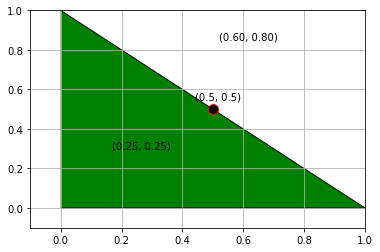

The point is located on the border with coordinance of (0.5, 0.5).




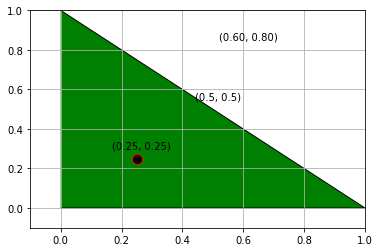

The point is located on the inside with coordinance of (0.25, 0.25).




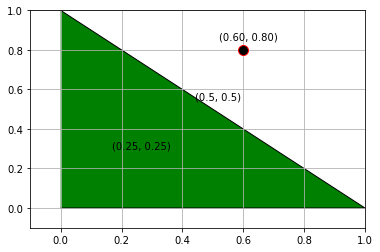

The point is located on the outside with coordinance of (0.6, 0.8).

The function my_inside_triangle(x, y) finds points inside (inside)
the triangle, on the lines (border), and those outside (outside) of the triangle.
Just enter the (x, y) coordinance in the function and it will tell you where
the point is located relative to the area of the triangle bound by (0, 0)(1, 0) and (0, 1).



In [5]:
# EX3 


def my_inside_triangle(x, y):
        if x <= 1 and x >= 0 and y <= 1 and y >= 0 and x <= 1-y: 
            # Test for all points inside the triangle
            if x <= 1 and x >= 0 and y <= 1 and y >= 0 and x == 1-y: 
                # test for points on line (0, 1) to (1, 0), slope -1
                where = 'border'
            elif x <= 1 and x >= 0 and y == 0:
                # test for points on the x axis from (0, 0) to (1, 0)
                where ='border'
            elif y <= 1 and y >= 0 and x == 0:
                # test for points on the y axis from (0, 0) to (0, 1)
                where ='border'
            else:
                where = 'inside'
        else:
            where = 'outside'

        pts = np.array([[0,0], [1,0], [0,1]])
        x = x
        y = y
        p = Polygon(pts, closed=False, fill=True, fc='green', ec='black')
        ax = plt.gca()
        ax.add_patch(p)
        ax.set_xlim(-0.1, 1)
        ax.set_ylim(-0.1, 1)
        ax.grid()
        ax.plot(x, y, marker="o", markersize=10, markeredgecolor="red", markerfacecolor="black")
        ax.annotate('(0.5, 0.5)',
                xy=(0.5, 0.5), xycoords='data',
                xytext=(5, 8), textcoords=('offset points'),
                horizontalalignment='center',
                verticalalignment='bottom')
        ax.annotate('(0.25, 0.25)',
                    xy=(0.25, 0.25), xycoords='data',
                    xytext=(5, 8), textcoords=('offset points'),
                    horizontalalignment='center',
                    verticalalignment='bottom')
        ax.annotate('(0.60, 0.80)',
                    xy=(0.6, 0.8), xycoords='data',
                    xytext=(5, 8), textcoords=('offset points'),
                    horizontalalignment='center',
                    verticalalignment='bottom')
        plt.show()
        return (where, x, y)
    
loc1, x1, y1 = my_inside_triangle(0.5, 0.5)
print(f'The point is located on the {loc1} with coordinance of {x1, y1}.\n\n')
loc2, x2, y2 = my_inside_triangle(0.25, 0.25)
print(f'The point is located on the {loc2} with coordinance of {x2, y2}.\n\n')
loc3, x3, y3 = my_inside_triangle(0.6, 0.8)
print(f'The point is located on the {loc3} with coordinance of {x3, y3}.\n')
print('The function my_inside_triangle(x, y) finds points inside (inside)\nthe triangle,'
      ' on the lines (border), and those outside (outside) of the triangle.\n'
      'Just enter the (x, y) coordinance in the function and it will tell you where\nthe'
      ' point is located relative to the area of the triangle bound by (0, 0)(1, 0) and (0, 1).\n')

In [12]:
# EX4

def my_make_size10(x):
    if len(x) > 10:
        x = x[0:10]
    elif len(x) > 0 and len(x) < 10:
        x = np.pad(x, (0, 10-len(x)), 'constant', constant_values=(0))
    return x


c1 = my_make_size10(np.array(np.arange(1,3)))
c2 = my_make_size10(np.array(np.arange(1,15)))
c3 = my_make_size10(np.array(np.arange(3,13,3)))
sizes1 = pd.Series({'Case 1': c1, 'Case 2': c2, 'Case 3': c3})
display(c1)
display(c2)
display(c3)
print("The table below is for all four cases with if - else statements.")
print(sizes1.to_string(), '\n')

array([1, 2, 0, 0, 0, 0, 0, 0, 0, 0])

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

array([ 3,  6,  9, 12,  0,  0,  0,  0,  0,  0])

The table below is for all four cases with if - else statements.
Case 1     [1, 2, 0, 0, 0, 0, 0, 0, 0, 0]
Case 2    [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
Case 3    [3, 6, 9, 12, 0, 0, 0, 0, 0, 0]


In [14]:
# EX5

def my_make_size10(x):
    x = x[0:10]
    x = np.pad(x, (0, 10-len(x)), 'constant', constant_values=(0))
    return x

c11 = my_make_size10(np.array(np.arange(1,3)))
c22 = my_make_size10(np.array(np.arange(1,15)))
c33 = my_make_size10(np.array(np.arange(3,13,3)))
sizes2 = pd.Series({'Case 1': c11, 'Case 2': c22, 'Case 3': c33})
display(c11)
display(c22)
display(c33)
print("The table below is for all four cases without if - else statements.")
print(sizes2.to_string(), '\n')

array([1, 2, 0, 0, 0, 0, 0, 0, 0, 0])

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

array([ 3,  6,  9, 12,  0,  0,  0,  0,  0,  0])

The table below is for all four cases without if - else statements.
Case 1     [1, 2, 0, 0, 0, 0, 0, 0, 0, 0]
Case 2    [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
Case 3    [3, 6, 9, 12, 0, 0, 0, 0, 0, 0] 



In [51]:
# EX6


def my_letter_grader(percent="C"):
    if percent >= 97:
        grade = 'A+'
    elif percent > 93:
        grade = 'A'
    elif percent > 90:
        grade = 'A-'
    elif percent > 87:
        grade = 'B+'
    elif percent > 83:
        grade = 'B'
    elif percent > 80:
        grade = 'B-'
    elif percent > 77:
        grade = 'C+'
    elif percent > 73:
        grade = 'C'
    elif percent > 70:
        grade = 'C-'
    elif percent > 67:
        grade = 'D+'
    elif percent > 73:
        grade = 'D'
    elif percent > 60:
        grade = 'D-'
    else:
        grade = 'F'
    return grade


Cas_1 = my_letter_grader(97)
Cas_2 = my_letter_grader(84)
grades = pd.DataFrame({'Average': ['97%', '84%'],'Grade': [Cas_1, Cas_2]})
display(grades.style.set_properties(**{'text-align': 'center'}).hide(axis='index'))
print('Grades bases on average percents.')
print(grades.to_string(index=False), '\n')

Average,Grade
97%,A+
84%,B


Grades bases on average percents.
Average Grade
  97%     A+ 
  84%      B  



In [125]:
# EX7


def my_nuke_alarm(s1, s2, s3):
    """This function used data from three temperature sensors (s1, s2, s3) and evaulates 
    if they exceed 10° change.
    If they do not no alarm but if the difference between any of them is > 10° then alarm."""
    if abs(s1-s2) > 10 or abs(s2-s3) > 10 or abs(s1-s3) > 10:
        responce = "-ALARM!- "
    else:
        responce = 'Normal'
    return responce

nuk1 = my_nuke_alarm(94, 96, 90)
nuk2 = my_nuke_alarm(94, 96, 80)
nuk3 = my_nuke_alarm(100, 96, 90)
alarms = pd.DataFrame({'4 Hour Temps °F': [[94, 96, 90], [94, 96, 80], [100, 96, 90]],'Condition': [nuk1, nuk2, nuk3]})
pd.set_option('display.colheader_justify', 'center')
display(alarms.style.set_properties(**{'text-align': 'center'}).hide(axis='index'))
print('Daily checks on alarm system.')
print(alarms.to_string(index=False), '\n')

4 Hour Temps °F,Condition
"[94, 96, 90]",Normal
"[94, 96, 80]",-ALARM!-
"[100, 96, 90]",Normal


Daily checks on alarm system.
4 Hour Temps °F Condition
  [94, 96, 90]     Normal
  [94, 96, 80]  -ALARM!- 
 [100, 96, 90]     Normal 



In [119]:
# EX8
# Solving the quadratic equations Q(x) = ax2 + bx + c


def my_n_roots(a, b, c):
    """This function will solve for roots to the quadratic equations Q(x) = ax2 + bx + c.
    it is based on quadratic formula r = (-b ± √b² - 4ac)/2a where (√b² - 4ac) is the determinate.
    a, b, c are the Coefficients used in the function."""
    det = (b**2) - 4*a*c # Calculate the determinate.
    if (b**2) > (4*a*c): # Returns a real number.
        r1 = (-b + math.sqrt(det))/(2*a)
        r2 = (-b - math.sqrt(det))/(2*a)
        r1 = 'root 1: {:.3f}'.format(r1) # Format the number & include root r1
        r2 = 'root 2: {:.3f}'.format(r2)
        r = np.array([r1, r2]).tolist()
        # The tolist removes the dtype from th printout.
        n_roots = 2
    elif (b**2) < (4*a*c): # Returns a imaginary number.
        r1 = (-b + cmath.sqrt(det))/(2*a)
        r2 = (-b - cmath.sqrt(det))/(2*a)
        r1 = 'root 1: {:.4f}'.format(r1)
        r2 = 'root 2: {:.4f}'.format(r2)
        r = np.array([r1, r2]).tolist()
        # The tolist removes the dtype from th printout.
        n_roots = -2
    else:                 # Returns a single root
        r1 = (-b + math.sqrt(det))/(2*a)
        r2 = (-b - math.sqrt(det))/(2*a)
        if r1 == r2:
            r1 = 'root: {:.2f}'.format(r1)
            r = np.array([r1]).tolist()
            # The tolist removes the dtype from th printout.
            n_roots = 1
    return(n_roots, r)

sol1 = my_n_roots(1, 0, -9)
sol2 = my_n_roots(3, 4, 5)
sol3 = my_n_roots(2, 4, 2)
pd.set_option('display.colheader_justify', 'right')
roots = pd.DataFrame({'Coefficients a, b, c': [(1, 0, -9), (3, 4, 5), (2, 4, 2)],'Number of Roots, Roots': [sol1, sol2, sol3]})
print('Roots to the quadratic equation Q(x) = ax2 + bx + c.\n where Q(x) = 0, x = roots')
display(roots.style.set_properties(**{'text-align': 'right'}).hide(axis='index'))
print(roots.to_string(index=False), '\n')


Roots to the quadratic equation Q(x) = ax2 + bx + c.


"Coefficients a, b, c","Number of Roots, Roots"
"(1, 0, -9)","(2, ['root 1: 3.000', 'root 2: -3.000'])"
"(3, 4, 5)","(-2, ['root 1: -0.6667+1.1055j', 'root 2: -0.6667-1.1055j'])"
"(2, 4, 2)","(1, ['root: -1.00'])"


Coefficients a, b, c                                   Number of Roots, Roots
          (1, 0, -9)                     (2, [root 1: 3.000, root 2: -3.000])
           (3, 4, 5) (-2, [root 1: -0.6667+1.1055j, root 2: -0.6667-1.1055j])
           (2, 4, 2)                                       (1, [root: -1.00]) 



In [157]:
# EX9


def my_split_function(f, g, a, b, x):
    """This function accepts any function (f) and (g) and varifies that b > a to insure compatibility.
    The functions f(x) and g(x) use x in the criteria given x <= a the f(x) and x >= b for the given 
    boundries a and b. The results from three case are used here."""
    if b > a:
        if x <= a:
            funct = str(f)
            result = f(x)
            result = '{:.3f}'.format(result)
            return funct, result
        elif x >= b:
            funct = str(g)
            result = g(x)
            result = '{:.3f}'.format(result)
            return funct, result
        else:
            funct = ('None')
            result = 0.0
            result = '{:.1f}'.format(result)
            return funct, result
    else:
        funct = ('Does not meet criteria that b > a.')
        return funct, 0.0


sp1 = my_split_function(np.exp, np.sin, 2, 4, 1)
sp2 = my_split_function(np.exp, np.sin, 2, 4, 3)
sp3 = my_split_function(np.exp, np.sin, 2, 4, 5)
function = pd.DataFrame({'(2, 4, 1) ': sp1,'(2, 4, 3)': sp2, '(2, 4, 5)': sp3})
print('Split function')
display(function = function.style.set_table_styles([dict(selector='th', props=[('text-align', 'center')])]))
display(function.style.set_properties(**{'text-align': 'right'}).hide(axis='index'))

print(function.to_string(index=False), '\n')

Split function


"(2, 4, 1)","(2, 4, 3)","(2, 4, 5)"
,None,
2.718,0.0,-0.959


  (2, 4, 1)   (2, 4, 3)   (2, 4, 5)  
<ufunc 'exp'>    None   <ufunc 'sin'>
        2.718     0.0          -0.959 



In [133]:
np.exp(1)

2.718281828459045